<a href="https://colab.research.google.com/github/psiudo/NumericalMethods/blob/main/diabets_type_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import kagglehub

#Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


In [15]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt; import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout; import random
from sklearn.model_selection import train_test_split
from keras.callbacks import History
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

df=pd.read_csv("/root/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1/diabetes.csv")
df.head(); df.info()
x=df.drop("Outcome", axis=1)
y=df["Outcome"]
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.85)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train, train_size=0.85)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - Precision: 0.3877 - Recall: 0.4986 - accuracy: 0.5523 - loss: 7.4340 - val_Precision: 0.3913 - val_Recall: 0.3000 - val_accuracy: 0.6429 - val_loss: 0.8029
Epoch 2/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Precision: 0.3933 - Recall: 0.4673 - accuracy: 0.5351 - loss: 2.4822 - val_Precision: 0.3019 - val_Recall: 0.5333 - val_accuracy: 0.4796 - val_loss: 0.7300
Epoch 3/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.4122 - Recall: 0.4598 - accuracy: 0.5788 - loss: 1.5716 - val_Precision: 0.4194 - val_Recall: 0.4333 - val_accuracy: 0.6429 - val_loss: 0.7081
Epoch 4/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.4775 - Recall: 0.5409 - accuracy: 0.6240 - loss: 1.1025 - val_Precision: 0.2821 - val_Recall: 0.3667 - val_accuracy: 0.5204 - val_loss: 0.7133
Epoch 5/500
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Precision: 0.3465 - Recall: 0.4080 - accuracy: 0.5278 - loss: 1.1471 - val_Precision: 0.0000e+00 - val_Recall:

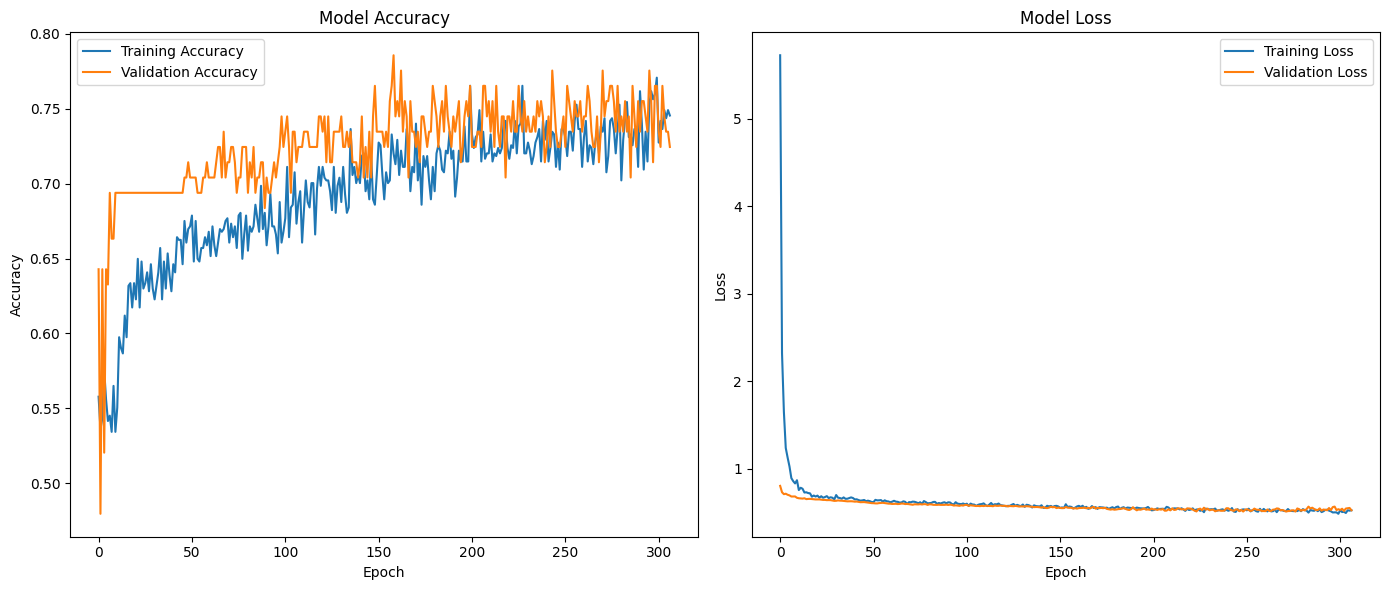

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


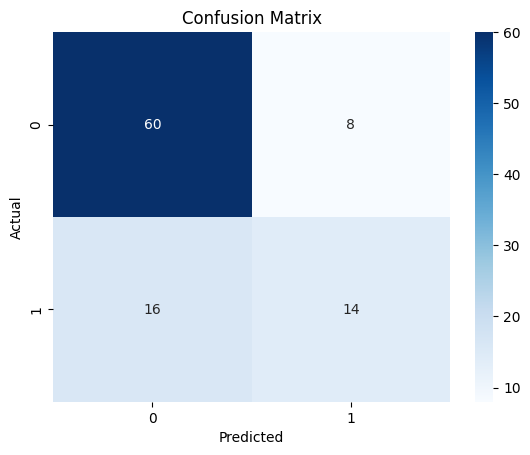

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        68
           1       0.64      0.47      0.54        30

    accuracy                           0.76        98
   macro avg       0.71      0.67      0.69        98
weighted avg       0.74      0.76      0.74        98



In [29]:
model = Sequential([
    Dense(128, input_dim=x_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

# Set up callbacks: Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    epochs=500,
    batch_size=16,
    verbose=1,
    callbacks=[early_stopping]
)

# Visualize training results
plt.figure(figsize=(14, 6))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Predictions on validation data
y_pred_prob = model.predict(x_valid)
y_pred = (y_pred_prob > 0.5).astype(int)

# Confusion matrix and classification report
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:\n", classification_report(y_valid, y_pred))